In [1]:
import glob
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from math import sqrt

In [2]:
events = []
for file in glob.glob('*.degrad'):
    with open(file) as f:
        content = f.readlines()
    content = [x.strip() for x in content] 
    events.extend(content[1::2])

In [3]:
evtnums, x, y, z = (list() for _ in range(4))

for i, evt in enumerate(events):
    words  = evt.split()
    values = np.array(words, dtype=float)
    nrows  = 7
    ncols  = int(len(values)/7)
    values = values.reshape(ncols,nrows)
    xl = np.divide(values[:,0], 1e3).tolist()
    yl = np.divide(values[:,1], 1e3).tolist()
    zl = np.divide(values[:,2], 1e3).tolist()
    x.extend(xl)
    y.extend(yl)
    z.extend(zl)
    evtnums.extend([i]*len(xl))

In [4]:
df = pd.DataFrame({'event_number': evtnums, 'x': x, 'y': y, 'z': z})

In [6]:
df

,event_number,x,y,z
0,0,-14.008867,-15.473230,40.176284
1,0,0.000122,0.000022,0.000028
2,0,-0.000019,0.000054,0.000202
3,0,-0.003479,0.009692,0.035936
4,0,-0.005501,0.013637,0.051531
5,0,-0.011208,0.022363,0.088583
6,0,-0.011138,0.022332,0.088548
7,0,-0.011138,0.022332,0.088548
8,0,-0.011861,0.023369,0.093418
9,0,-0.019731,0.034450,0.154900


                   xdist       ydist       zdist        diag
event_number                                                
0              15.244738   16.951565   43.910831   49.476446
1             444.300220  240.225130  402.260131  645.696532
2              18.250929   37.990227   18.047313   45.848220
3              13.071397   20.148291   15.711059   28.699346
4              23.467515   42.992886   12.302673   50.502161
5              20.806895   31.795978   15.480073   41.031009
6              49.804040    9.019721   12.640370   52.168733
7              26.132562   12.251567   18.687271   34.383510
8              33.464599   25.464382   15.882859   44.950855
9              25.222326   15.795091   17.532287   34.540291


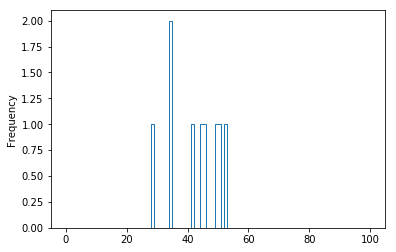

In [5]:
dist = pd.DataFrame({'xdist': df.groupby('event_number').x.max() - df.groupby('event_number').x.min(), 
                     'ydist': df.groupby('event_number').y.max() - df.groupby('event_number').y.min(), 
                     'zdist': df.groupby('event_number').z.max() - df.groupby('event_number').z.min()})
def diagonal(row):
    return sqrt(row['xdist']**2 + row['ydist']**2 + row['zdist']**2)
dist['diag'] = dist.apply(diagonal, axis=1)
dist['diag'].plot.hist(range=(0.,100.), bins=100, histtype='step')
#fig = ax.get_figure()
#fig.savefig('diagonal.pdf')
print(dist)

In [7]:
from invisible_cities.evm.event_model import BHit
from invisible_cities.reco import paolina_functions as plf

In [8]:
df_one = df[df.event_number == 2]
hit_list = [BHit(row.x, row.y, row.z, 1.) for indx, row in df_one.iterrows()]
voxels = plf.voxelize_hits(hit_list, np.array((1., 1., 1.)))
tracks = plf.make_track_graphs(voxels)
plf.length(tracks[0])

72.60883023301652

In [9]:
len(tracks)

1

In [10]:
trk_lengths = []
for i in range(df.event_number.max()+1):
    df_one = df[df.event_number == i]
    hit_list = [BHit(row.x, row.y, row.z, 1.) for indx, row in df_one.iterrows()]
    voxels = plf.voxelize_hits(hit_list, np.array((1., 1., 1.)))
    tracks = plf.make_track_graphs(voxels)
    trk_lengths.append(plf.length(tracks[0]))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 3., 1., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120.]),
 <a list of 30 Patch objects>)

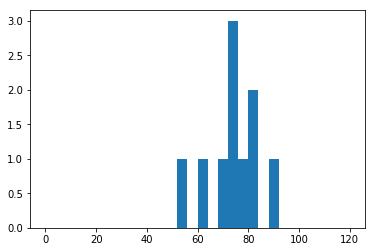

In [11]:
plt.hist(trk_lengths, range=(0,120.), bins=30)

In [12]:
len(trk_lengths)

10